#### Costly or Affordable? A Median-Based Split of Property Prices

***Import Lib.***

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats  import chi2_contingency

***Load your data***

In [20]:
df = pd.read_csv('C:/Users/5530/OneDrive/Desktop/Real_State_Housing_Mumbai/Creation & Handling of CSV files/CSV_Files/simple_sampling.csv')

***Calculate the Median***

In [21]:
median_price = df['price_lakhs'].median()
print(f'Median Price: ₹{median_price:.2f}')

Median Price: ₹151.13


***Create a Bernoulli variable: 1 if above median, else 0***

In [22]:
df['above_median'] = df['price_lakhs'].apply(lambda x:1 if x> median_price else 0)

***Visual***

C:\Users\5530\AppData\Local\Temp\ipykernel_18092\56089348.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='above_median', palette='Set1')


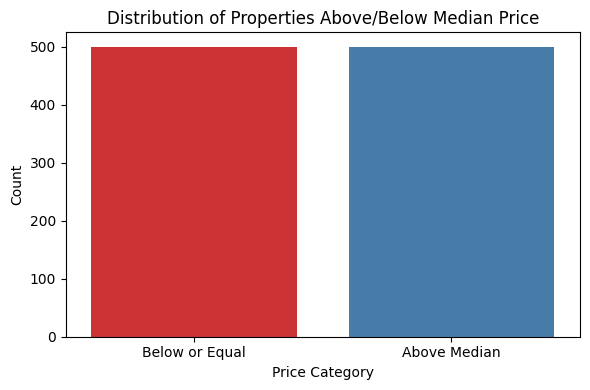

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='above_median', palette='Set1')
plt.title("Distribution of Properties Above/Below Median Price")
plt.xticks([0, 1], ['Below or Equal', 'Above Median'])
plt.xlabel("Price Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [24]:
# Print proportions
p = df['above_median'].mean()

print(f"Proportion of properties above median price: {p:.2%}")
print(f"Proportion of properties at or below median price: {(1 - p):.2%}")

Proportion of properties above median price: 50.00%
Proportion of properties at or below median price: 50.00%


___________

***Objective:***

Compare how furnishing status (Furnished ,  Unfurnished) influences whether a property is costly (1) or affordable (0).

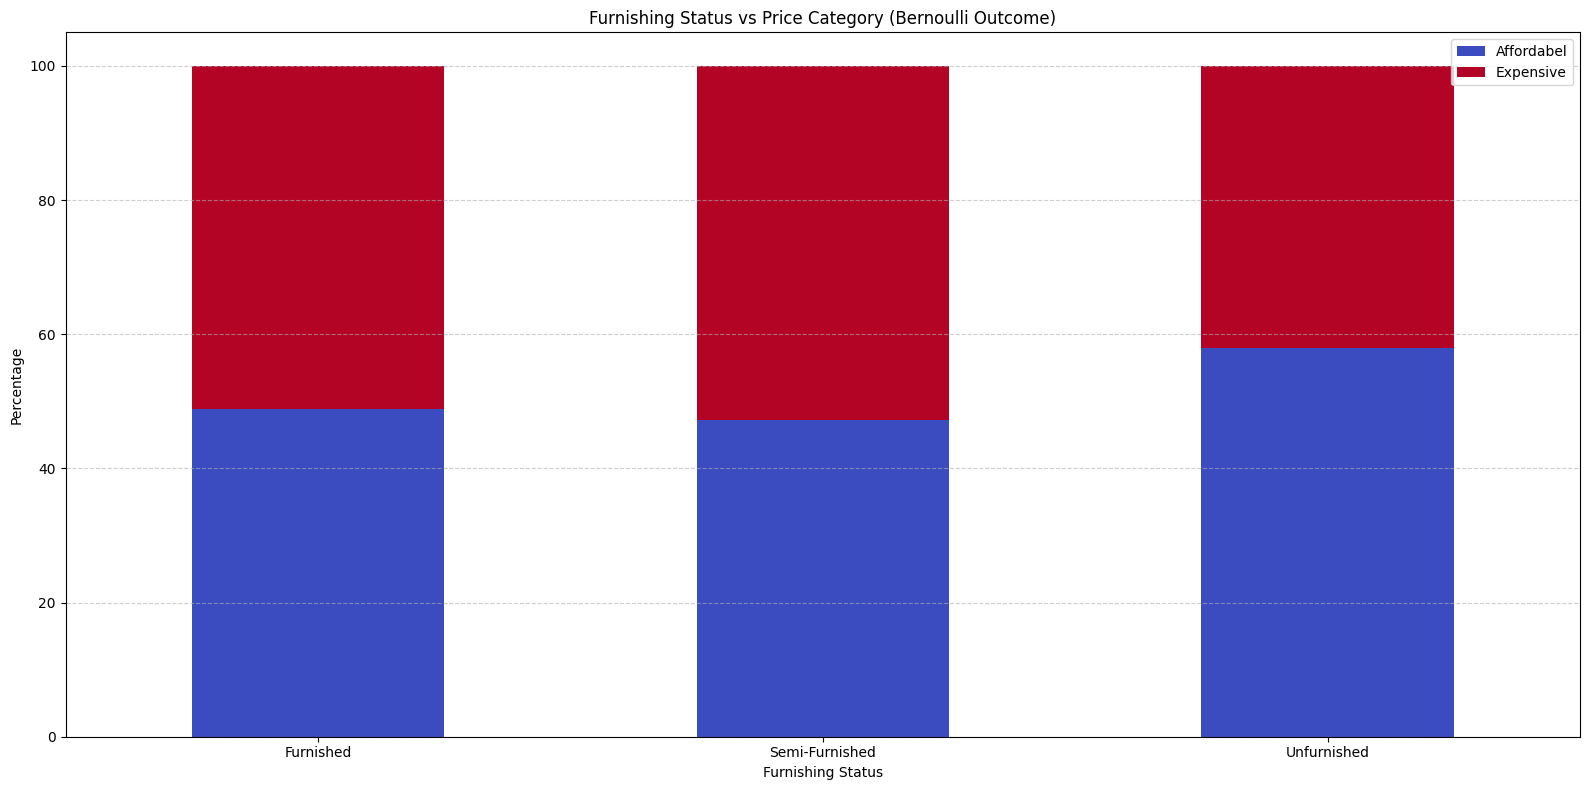

In [25]:
#Plot the proportion of costly vs affordable by furnishing type
furnished_count = pd.crosstab(df['furnished_status'],df['above_median'],normalize = 'index') *100
furnished_count.columns = ['Affordabel' ,'Expensive']

furnished_count.plot(kind ='bar', stacked= True,figsize=(16,8), colormap='coolwarm')

plt.title('Furnishing Status vs Price Category (Bernoulli Outcome)')
plt.ylabel('Percentage')
plt.xlabel('Furnishing Status')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

__________

***Objective:***

Visualize the proportion of costly listings per area to find high-end vs affordable regions.

C:\Users\5530\AppData\Local\Temp\ipykernel_18092\246117002.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_bernoulli.values * 100, y=area_bernoulli.index, palette='Spectral')


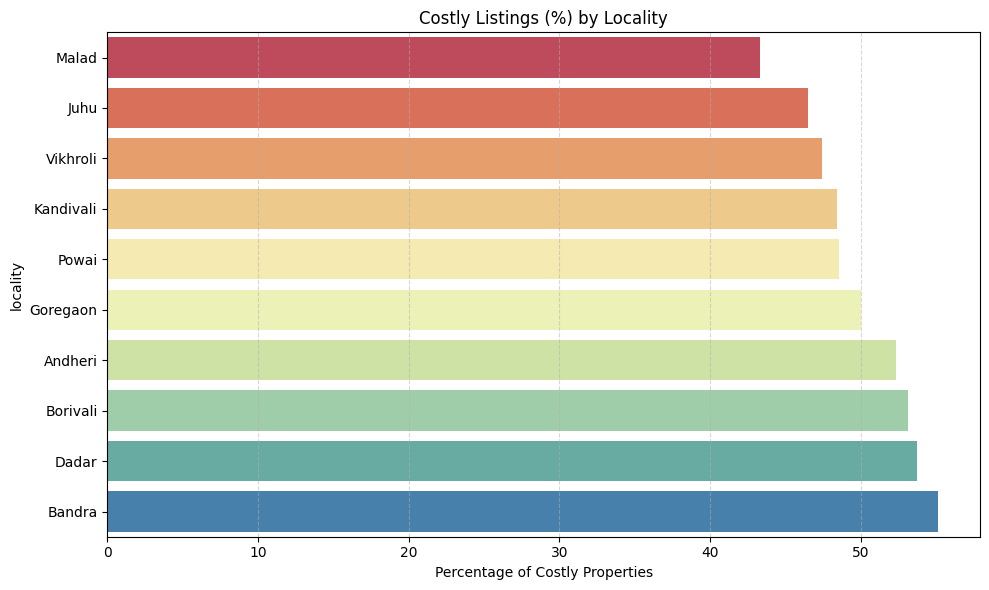

In [26]:
#Group By locality ('Andheri','Bandra','Powai' etc)
area_bernoulli = df.groupby('locality')['above_median'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=area_bernoulli.values * 100, y=area_bernoulli.index, palette='Spectral')
plt.xlabel('Percentage of Costly Properties')
plt.title('Costly Listings (%) by Locality')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

_____

***Applying a Hypothesis Test: Furnishing vs Costly Probability***

In [27]:
contingency_table = pd.crosstab(df['furnished_status'],df['above_median'])

#Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)
if p < 0.05:
    print("✅ Furnishing status significantly affects the likelihood of a property being costly.")
else:
    print("❌ No significant impact of furnishing status on costly vs affordable pricing.")

Chi-Square Statistic: 6.3282199426541546
p-value: 0.042251730335673525
✅ Furnishing status significantly affects the likelihood of a property being costly.
